In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('../data/행정동_최종ver.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.rename(columns={'MZ_POP_CNT':'MZ_NUM'},inplace=True)
tmp_df.rename(columns={'VEGAN_CNT':'VEGAN_NUM'},inplace=True)
tmp_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,...,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,VEGAN_NUM,RETAIL_NUM,COLIVING_NUM,MZ_NUM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,...,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,5.000000,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,...,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,8.000000,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,6.000000,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,...,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,1.000000,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,2.000000,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,...,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,2.333333,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,...,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,2.333333,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,...,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,1.000000,8.000000,0.0,14486


In [4]:
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'VEGAN_NUM', 'RETAIL_NUM', 'COLIVING_NUM',
       'MZ_NUM'],
      dtype='object')

In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp_df = tmp_df.set_index(['GU','DONG'])
density_df = density_df.set_index(['GU','DONG'])
temp = tmp_df.join(density_df)
tmp = temp.reset_index()

In [7]:
# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM','VEGAN_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,...,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,0.000000,4.000000,...,18.000000,0.000000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000,5.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,2.000000,20.000000,...,19.000000,10.000000,10.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000,8.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,0.000000,2.000000,...,2.000000,10.000000,1.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000,6.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,0.000000,8.000000,...,24.000000,0.000000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000,1.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,0.000000,6.000000,...,28.000000,0.000000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,63.333333,16.666667,4.000000,8130,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667,2.333333
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,63.333333,16.666667,4.000000,7120,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667,2.333333
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,8.000000,76.000000,...,100.000000,20.000000,10.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000,1.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,0.000000,17.000000,...,38.000000,0.000000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000,0.500000


In [8]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,...,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,2.995305,27.239437,37.985915,2.838028,...,57.737089,21.572770,14.323944,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897,3.929577
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,2.904085,19.771517,37.562957,1.465365,...,56.280168,18.688217,14.060665,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441,4.372210
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,1.333333,17.714286,19.541667,2.000000,...,27.090909,10.000000,4.381250,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000,1.500000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,2.400000,22.500000,27.363636,2.400000,...,41.166667,20.000000,10.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000,3.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,4.000000,29.333333,39.250000,3.600000,...,70.000000,30.000000,18.000000,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000,4.666667
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,28.000000,170.000000,274.000000,10.000000,...,480.250000,170.000000,101.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000,40.000000


In [9]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [10]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'RETAIL_NUM', 'CON_NUM',
       'CAFE_NUM', 'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'MZ_NUM', 'COLIVING_NUM', 'KIDS_NUM',
       'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM',
       'VEGAN_NUM'],
      dtype='object')

In [11]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [12]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.04,0.27,0.44,0.25],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARENTING']

In [13]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [14]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING
0,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333
1,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333
2,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000
3,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000
4,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667
422,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667
423,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000
424,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000


In [15]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM','VEGAN_NUM']
    df = df[column_list]
    return df

In [16]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARENTING', 'MZ_NUM',
       'COLIVING_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM',
       'CAR_SHR_NUM', 'ANI_HSPT_NUM', 'VEGAN_NUM'],
      dtype='object')

In [17]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000,5.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000,8.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000,6.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000,1.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667,8130,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667,2.333333
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667,7120,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667,2.333333
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000,1.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000,0.500000


In [18]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,15.812629,54.546948,40.485962,22.293099,43.064977,35.896714,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897,3.929577
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.637535,41.269881,33.313301,17.783109,39.861247,25.925220,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441,4.372210
min,1.111052e+09,144.000000,0.230000,157.000000,2.070000,4.333333,1.000000,1.431667,0.700000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.540000,26.589286,22.480000,13.440833,20.842727,16.750000,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000,1.500000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.497000,42.750000,33.070000,17.945000,31.662500,30.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000,3.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,19.942500,67.075000,46.221000,23.131500,52.250000,48.187500,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000,4.666667
max,1.174070e+09,56012.000000,12.680000,55657.000000,73.811818,252.500000,242.700000,135.775000,342.280000,207.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000,40.000000


### 1.3 면적 당 수치 계산

In [19]:
area = tmp_df['AREA']

In [20]:
columns = tmp_df.columns[6:]

In [21]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210,1.945525
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008,6.504065
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000,4.026846
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586,0.440529
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000,0.225479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100,3.482587
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869,3.286385
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636,0.460829
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435,0.543478


In [22]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,14.899219,56.413573,40.203343,21.706931,42.454016,36.996223,7109.301320,0.166431,0.498434,1.159477,0.188286,2254.690189,1.223275,7.136976,3.344890,4.052260,2.152990,3.673772
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.722790,50.615331,28.324127,14.839065,42.415614,28.662723,3922.924848,0.582447,0.632681,1.733016,0.305553,3915.731918,1.647054,5.813202,3.367516,2.819812,1.543945,3.567198
min,1.111052e+09,144.000000,0.230000,157.000000,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,22.375445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.331860,23.515357,19.444727,11.931636,19.589909,15.043297,4088.947368,0.000000,0.000000,0.238595,0.000000,425.640244,0.000000,3.012962,1.204481,1.949320,1.010498,1.491805
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.183811,43.993671,35.314432,19.422745,32.325255,31.173590,7053.872138,0.000000,0.327602,0.648668,0.000000,943.124462,0.730461,5.902233,2.443618,3.571429,1.900506,2.835965
75%,1.161306e+09,27908.250000,1.487500,31708.500000,18.691749,73.260354,52.296139,27.678636,52.244898,50.301671,9397.635294,0.000000,0.745713,1.417603,0.316456,2071.379767,1.675408,9.523810,4.289551,5.570074,2.935049,4.837127
max,1.174070e+09,56012.000000,12.680000,55657.000000,136.688552,522.500000,211.043478,118.065217,390.982877,167.705167,27574.074074,5.405405,4.000000,18.686869,3.030303,34560.000000,12.121212,39.130435,28.260870,16.956522,9.090909,36.363636


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [23]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [146]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
왜도,5.072204,3.132583,1.547339,2.001621,4.00260,1.361778,0.685738,4.792325,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603,3.429052
첨도,56.811500,19.030154,4.134766,7.570355,23.55307,2.534743,1.285944,28.221618,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151,21.454968


In [147]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [148]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,21.454968


In [149]:
over = []
for column in standard_df.columns:
    if((standard_df[column][1] > 8)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [150]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GOLF_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,2.655983,2.604953,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,9.877211,10.645659,21.454968


In [151]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 8)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [152]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,VEGAN_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226,3.429052
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209,21.454968


In [27]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'COLIVING_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM', 'VEGAN_NUM'],
      dtype='object', name=0)

#### 1.4.2 범주화 작업
- 소음

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'TRANSPORT'}>],
       [<AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARENTING'}>],
       [<AxesSubplot:title={'center':'MZ_NUM'}>,
        <AxesSubplot:title={'center':'COLIVING_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSu

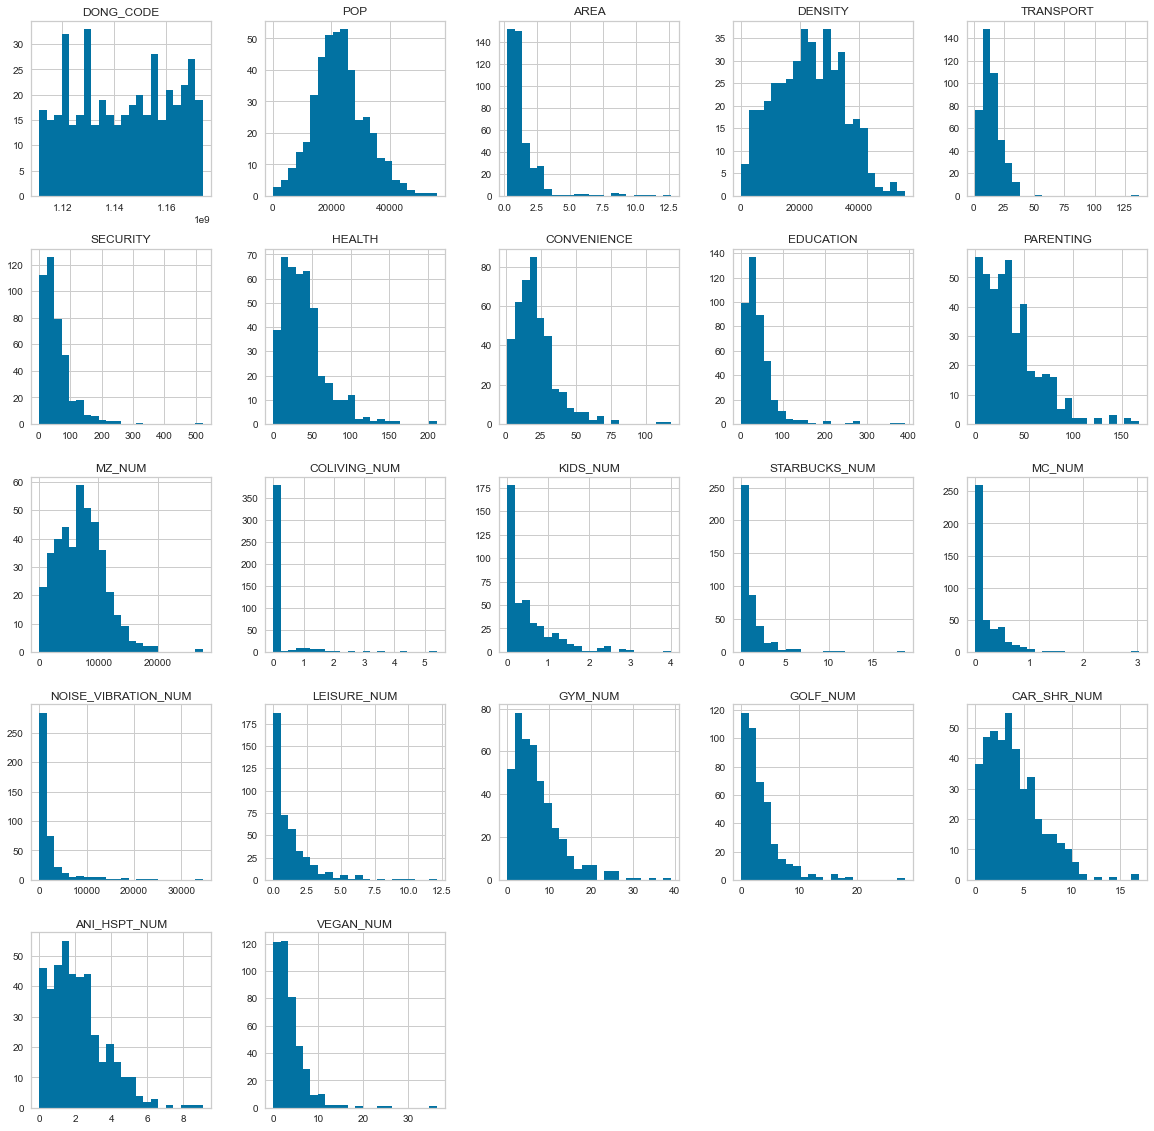

In [28]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

In [29]:
origin_df = tmp_df.copy()

**소음**

In [30]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

0       7321.400778
1      18575.609756
2       9471.140940
3       2664.317181
4        454.565953
           ...     
421     2152.736318
422     2031.455399
423     1994.009217
424     2351.630435
425     2207.653061
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [31]:
for i in range(len(noise)):
    if (noise[i] < 500):
        noise[i] = 4
    elif (noise[i] >= 500 and noise[i] < 1000):
        noise[i] = 3
    elif (noise[i] >= 1000 and noise[i] < 1500):
        noise[i] = 2
    else:
        noise[i] = 1
noise

0      1.0
1      1.0
2      1.0
3      1.0
4      4.0
      ... 
421    1.0
422    1.0
423    1.0
424    1.0
425    1.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [32]:
noise.value_counts()

1.0    147
4.0    124
3.0     99
2.0     56
Name: NOISE_VIBRATION_NUM, dtype: int64

In [33]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,1.945525
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008,6.504065
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,4.026846
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586,0.440529
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000,0.225479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100,3.482587
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869,3.286385
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636,0.460829
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435,0.543478


#### 1.4.3 최댓값 제한
- 교통
- 보안
- 교육
- 스타벅스
- 맥도날드

**교통**

<AxesSubplot:>

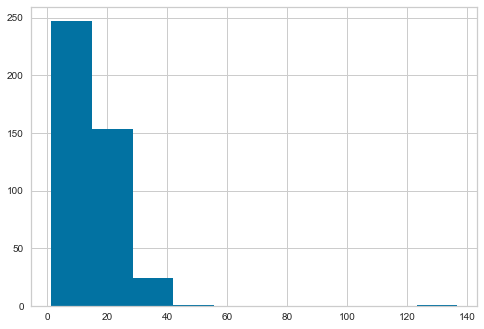

In [34]:
tmp_df['TRANSPORT'].hist()

In [35]:
tmp_df['TRANSPORT'].describe()

count    426.000000
mean      14.899219
std        9.722790
min        1.402529
25%        9.331860
50%       13.183811
75%       18.691749
max      136.688552
Name: TRANSPORT, dtype: float64

In [36]:
t = tmp_df['TRANSPORT'].quantile(0.95)
t

29.322401908801698

In [37]:
tmp_df['TRANSPORT'] = np.where(tmp_df['TRANSPORT'] > t, t, tmp_df['TRANSPORT'])

<AxesSubplot:>

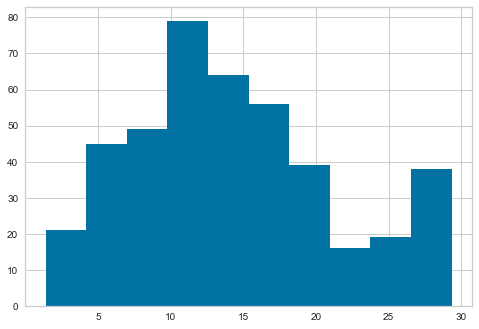

In [38]:
tmp_df['TRANSPORT'].hist()

In [39]:
tmp_df['TRANSPORT']

0       5.328145
1      13.750678
2       7.818792
3       3.819383
4       3.926719
         ...    
421    16.303483
422    12.765258
423    12.709677
424     4.945652
425    19.826531
Name: TRANSPORT, Length: 426, dtype: float64

In [40]:
tmp_df['TRANSPORT'] = np.log1p(tmp_df['TRANSPORT'])

<AxesSubplot:>

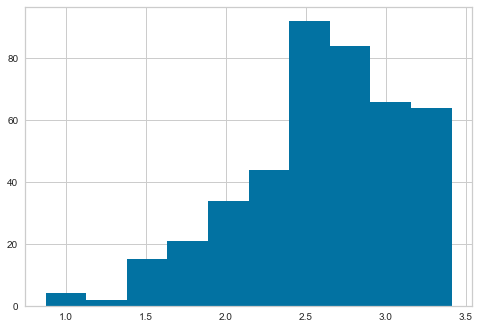

In [41]:
tmp_df['TRANSPORT'].hist()

**보안**

<AxesSubplot:>

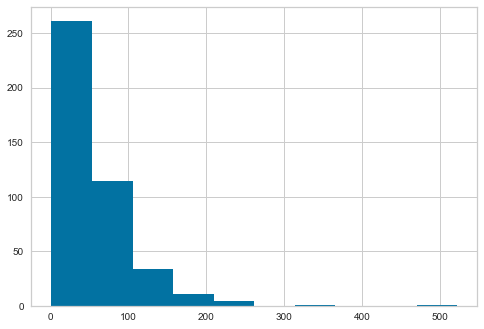

In [42]:
tmp_df['SECURITY'].hist()

In [43]:
tmp_df['SECURITY'].describe()

count    426.000000
mean      56.413573
std       50.615331
min        1.104101
25%       23.515357
50%       43.993671
75%       73.260354
max      522.500000
Name: SECURITY, dtype: float64

In [44]:
s = tmp_df['SECURITY'].quantile(0.95)
s

143.22741982936157

In [45]:
tmp_df['SECURITY'] = np.where(tmp_df['SECURITY'] > s, s, tmp_df['SECURITY'])

<AxesSubplot:>

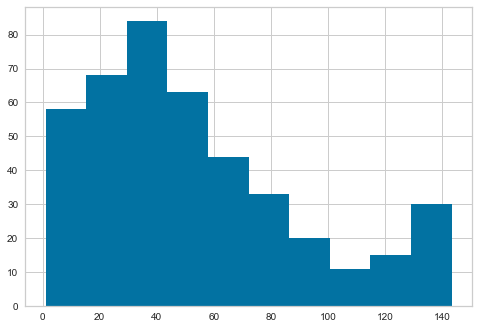

In [46]:
tmp_df['SECURITY'].hist()

In [47]:
tmp_df['SECURITY'] = np.log1p(tmp_df['SECURITY'])

<AxesSubplot:>

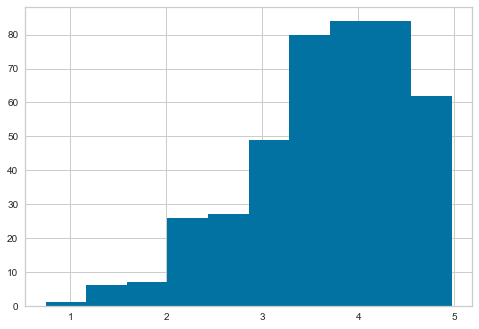

In [48]:
tmp_df['SECURITY'].hist()

**건강**

<AxesSubplot:>

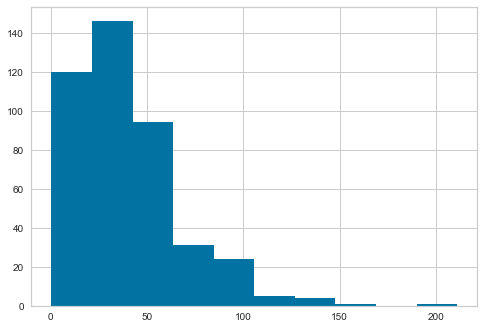

In [49]:
tmp_df['HEALTH'].hist()

In [50]:
h = tmp_df['HEALTH'].quantile(0.95)
h

96.691258111031

In [51]:
tmp_df['HEALTH'] = np.where(tmp_df['HEALTH'] > h, h, tmp_df['HEALTH'])

<AxesSubplot:>

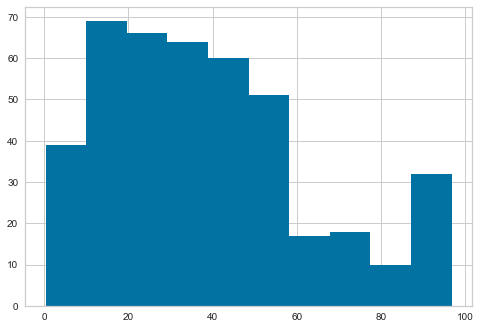

In [52]:
tmp_df['HEALTH'].hist()

In [53]:
tmp_df['HEALTH'] = np.log1p(tmp_df['HEALTH'])

<AxesSubplot:>

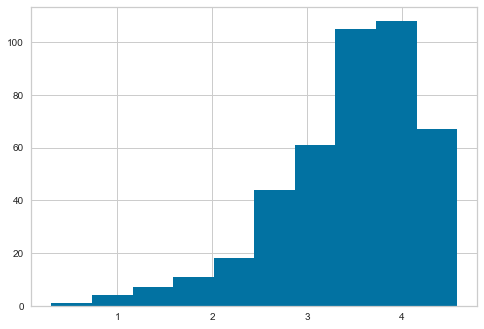

In [54]:
tmp_df['HEALTH'].hist()

**교육**

<AxesSubplot:>

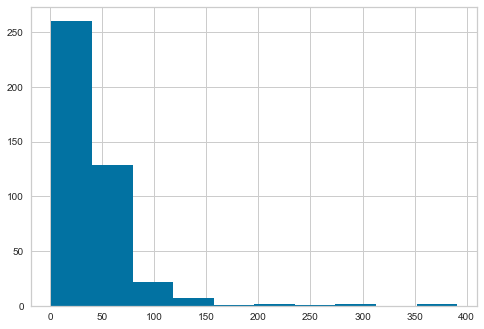

In [55]:
tmp_df['EDUCATION'].hist()

In [56]:
e = tmp_df['EDUCATION'].quantile(0.95)
e

105.6954219807904

In [57]:
tmp_df['EDUCATION'] = np.where(tmp_df['EDUCATION'] > e, e, tmp_df['EDUCATION'])

<AxesSubplot:>

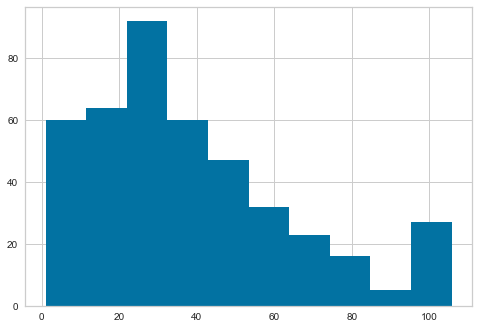

In [58]:
tmp_df['EDUCATION'].hist()

In [59]:
tmp_df['EDUCATION'] = np.log1p(tmp_df['EDUCATION'])

<AxesSubplot:>

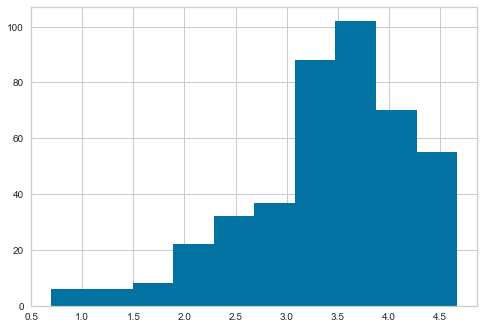

In [60]:
tmp_df['EDUCATION'].hist()

**MZ 세대원 수**

<AxesSubplot:>

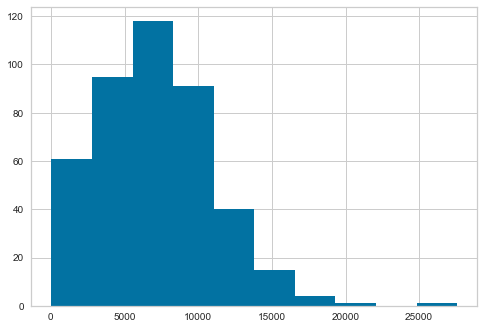

In [61]:
tmp_df['MZ_NUM'].hist()

In [62]:
m = tmp_df['MZ_NUM'].quantile(0.95)
m

13722.931785195935

In [63]:
tmp_df['MZ_NUM'] = np.where(tmp_df['MZ_NUM'] > m, m, tmp_df['MZ_NUM'])

<AxesSubplot:>

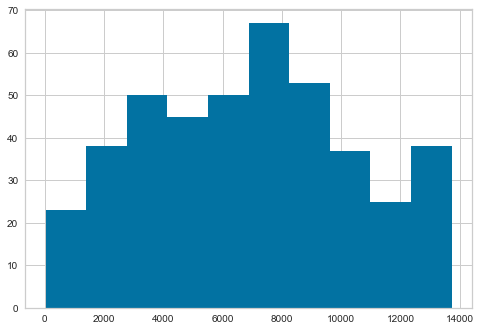

In [64]:
tmp_df['MZ_NUM'].hist()

**비건**

<AxesSubplot:>

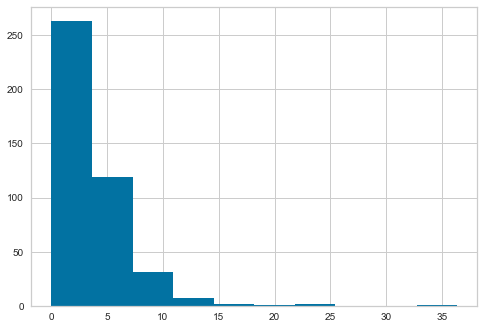

In [65]:
tmp_df['VEGAN_NUM'].hist()

In [66]:
v = tmp_df['VEGAN_NUM'].quantile(0.95)
v

9.544721998388397

In [67]:
tmp_df['VEGAN_NUM'] = np.where(tmp_df['VEGAN_NUM'] > v, v, tmp_df['VEGAN_NUM'])

<AxesSubplot:>

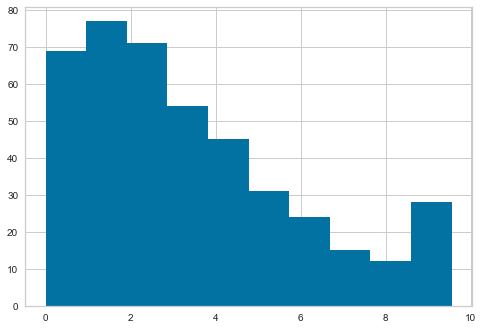

In [68]:
tmp_df['VEGAN_NUM'].hist()

In [70]:
tmp_df['VEGAN_NUM'] = np.log1p(tmp_df['VEGAN_NUM'])

<AxesSubplot:>

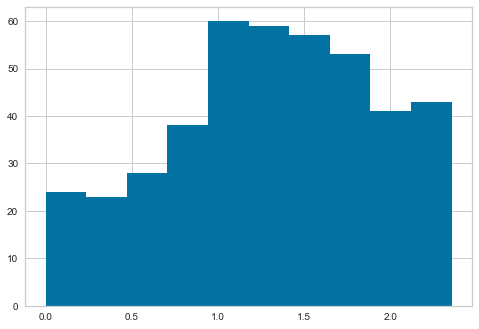

In [71]:
tmp_df['VEGAN_NUM'].hist()

일부 특성 로그변환

In [72]:
tmp_df['CONVENIENCE'] = np.log1p(tmp_df['CONVENIENCE'])

In [74]:
tmp_df['PARENTING'] = np.log1p(tmp_df['PARENTING'])

In [75]:
tmp_df['GOLF_NUM'] = np.log1p(tmp_df['GOLF_NUM'])

In [76]:
tmp_df['STARBUCKS_NUM'] = np.log1p(tmp_df['STARBUCKS_NUM'])

**RobustScaling**

In [77]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.000000,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008,2.015445
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.000000,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586,0.365010
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.000000,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000,0.203332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100,1.500200
422,강동구,성내3동,1174066000,23346,0.71,32882,2.622148,4.332277,4.389801,3.761528,4.176912,3.404790,10028.169014,0.000000,0.938967,1.057073,0.000000,1.0,2.347418,14.084507,2.024559,9.389671,3.755869,1.455444
423,강동구,길동,1174068500,45973,2.17,21186,2.618102,4.030686,3.988045,3.205328,3.577356,2.696307,6675.576037,0.000000,0.460829,0.653189,0.000000,1.0,1.382488,8.294931,1.638504,4.608295,3.686636,0.379004
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435,0.434038


In [78]:
col = df.columns[6:]
data = df[col]

In [79]:
scaler = RobustScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[-1.25137342, -0.55893333, -1.99521548, ..., -0.87891199,
        -0.58314657, -0.31029508],
       [ 0.06075936, -0.16885156,  0.50489459, ...,  0.13632856,
        -0.56506546,  0.78829456],
       [-0.7368077 , -0.90860279, -1.97056702, ..., -0.80101773,
        -0.98750582,  0.31762277],
       ...,
       [-0.05271481,  0.20225405,  0.41312333, ...,  0.28636758,
         0.92807625, -1.13413682],
       [-1.34804038, -0.16646863, -0.82538436, ..., -0.38597369,
        -0.14032924, -1.06948479],
       [ 0.59557568, -0.22190083, -0.88719827, ..., -0.42273309,
        -0.19219719, -1.09508723]])

In [80]:
df[col] = df_scaled
data = df[col]

In [81]:
data

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,-1.251373,-0.558933,-1.995215,-1.637250,-1.689682,-1.825638,-1.093461,0.000000,-0.439314,-0.565210,0.000000,-0.666667,-0.203745,-0.906523,-1.412793,-0.878912,-0.583147,-0.310295
1,0.060759,-0.168852,0.504895,0.442593,-0.968695,-0.522324,-0.907741,0.813008,-0.439314,2.153877,0.000000,-0.666667,0.049270,1.341133,-0.001524,0.136329,-0.565065,0.788295
2,-0.736808,-0.908603,-1.970567,-0.857536,-2.957494,-1.157051,-1.242268,0.000000,-0.439314,0.020247,0.000000,-0.666667,-0.435990,-0.597282,-1.412793,-0.801018,-0.987506,0.317623
3,-1.673661,-0.734128,-2.719174,-1.568679,-1.263754,-1.984778,-1.114231,0.000000,-0.439314,-0.747557,0.000000,-0.666667,-0.435990,-0.771202,-0.690889,-0.378039,-0.300808,-1.150577
4,-1.639508,-2.309248,-2.785565,-2.735059,-2.462022,-2.336693,-1.231116,0.000000,-0.439314,-0.587830,0.000000,0.333333,-0.435990,-0.819945,-0.902010,-0.986377,-0.987506,-1.340511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.308243,0.526017,0.892224,1.006377,0.765966,-0.008810,0.957008,0.000000,0.895012,0.890140,0.000000,-0.666667,1.048760,1.385863,0.958097,1.761738,1.080560,0.183004
422,-0.046442,0.474366,0.832433,0.935218,0.705841,-0.057083,0.560270,0.000000,0.819839,0.832997,0.000000,-0.666667,0.965113,1.256714,0.900375,1.606915,0.964050,0.130425
423,-0.052715,0.202254,0.413123,0.236893,0.074774,-0.666567,-0.071260,0.000000,0.178657,0.229103,0.000000,-0.666667,0.389176,0.367494,0.459287,0.286368,0.928076,-1.134137
424,-1.348040,-0.166469,-0.825384,-0.484354,-0.042176,-2.986106,-1.321984,0.000000,-0.439314,-0.747557,1.717391,-0.666667,-0.435990,-0.238741,0.243309,-0.385974,-0.140329,-1.069485


## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [82]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

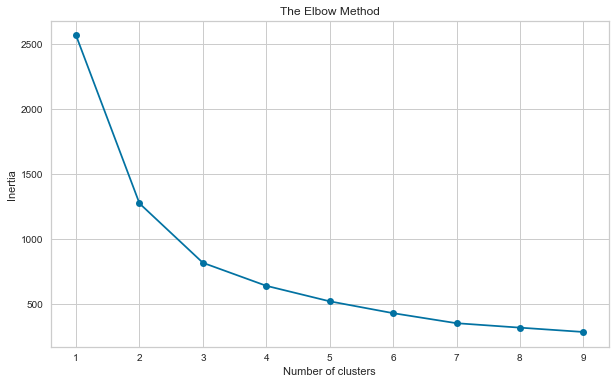

In [83]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [84]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [85]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
1,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


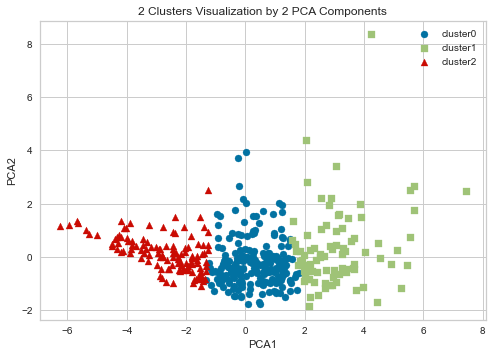

In [86]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [87]:
df[df['pca_y'] > 8] # MZ 세대가 적고, 코리빙, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.0,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.0,2.355625,1,4.219777,8.359848


In [88]:
df[df['pca_x'] > 6] # 편의 시설이 많고, 스타벅스가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,4.779671,4.669978,3.501764,8150.434783,0.0,0.869565,2.43666,0.869565,1.0,4.782609,39.130435,3.376251,16.521739,6.521739,2.355625,1,7.432968,2.489612


In [89]:
df[df['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
count,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0,222.000000,222.000000
mean,1.141731e+09,22890.085586,0.962072,25788.454955,2.749237,3.899850,3.636160,3.062485,3.574967,3.560521,7824.187988,0.168934,0.449107,0.589336,0.183769,2.486486,1.148368,6.591599,1.254683,3.982753,2.131332,1.412651,0.0,0.287819,-0.221465
std,1.847058e+07,8932.621594,0.439711,8914.837285,0.378470,0.602121,0.344895,0.321512,0.550546,0.651917,2909.062475,0.532111,0.509240,0.456302,0.274368,1.228359,1.200411,3.018949,0.546449,1.920557,1.062061,0.491134,0.0,0.762789,0.892634
min,1.111053e+09,1914.000000,0.230000,1980.000000,1.825294,2.055744,2.782454,2.253239,0.773190,0.747214,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.319669,-1.772369
25%,1.126058e+09,16607.250000,0.652500,20464.250000,2.481352,3.552946,3.389191,2.858227,3.312419,3.300343,6012.693653,0.000000,0.000000,0.345121,0.000000,1.000000,0.000000,4.347826,0.977719,2.854308,1.421466,1.085454,0.0,-0.285759,-0.781993
50%,1.141058e+09,22158.500000,0.900000,25494.500000,2.734843,3.902282,3.669379,3.054883,3.620874,3.628809,7913.250518,0.000000,0.377214,0.509170,0.000000,3.000000,0.877193,6.250000,1.288089,3.695823,2.142756,1.372259,0.0,0.271158,-0.401117
75%,1.159052e+09,28906.750000,1.130000,32488.500000,3.005986,4.305075,3.883631,3.278674,3.895882,3.956428,9534.895833,0.000000,0.636211,0.771736,0.311535,4.000000,1.675408,8.544403,1.633189,5.211014,2.738620,1.745968,0.0,0.952357,0.027453
max,1.174068e+09,52770.000000,2.940000,47116.000000,3.411887,4.971391,4.581812,4.340771,4.669978,4.970766,13722.931785,3.508772,2.857143,2.519998,1.449275,4.000000,6.567164,20.000000,2.546684,10.714286,5.357143,2.355625,0.0,1.797903,3.928979


In [90]:
df[df['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,km_cluster,pca_x,pca_y
count,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000
mean,1.148243e+09,22473.082353,0.812118,31388.835294,2.863077,4.265618,4.286030,3.661813,4.107319,3.880824,9655.033864,0.350372,1.082853,1.141973,0.376095,2.023529,2.681768,15.168027,1.941968,7.600163,4.029142,1.822868,1.0,3.087998,0.329378
std,1.913756e+07,7660.314415,0.446964,10473.282139,0.429150,0.590339,0.270135,0.350226,0.591256,0.729197,3174.284944,0.933129,0.858110,0.483783,0.437948,1.133646,2.513657,6.748263,0.563302,2.740635,1.627640,0.394215,0.0,1.149969,1.496075
min,1.111070e+09,3742.000000,0.230000,3780.000000,1.563501,2.353640,3.468460,2.993807,1.482832,1.963252,1235.353535,0.000000,0.000000,0.265399,0.000000,1.000000,0.000000,1.351351,0.557481,1.287554,0.000000,0.810930,1.0,1.588775,-1.850881
25%,1.135062e+09,17657.000000,0.550000,26236.000000,2.652151,3.883835,4.052530,3.412841,3.920449,3.501764,7638.970588,0.000000,0.416667,0.810930,0.000000,1.000000,1.010101,10.866261,1.563098,5.660377,3.181818,1.519826,1.0,2.165431,-0.543552
50%,1.150055e+09,22038.000000,0.670000,32005.000000,2.883090,4.355256,4.308263,3.663138,4.233953,4.056989,10028.169014,0.000000,0.995025,1.134528,0.342466,2.000000,2.016129,13.934426,1.936178,7.459677,4.032258,1.822722,1.0,2.893443,0.021398
75%,1.168051e+09,26549.000000,0.950000,38878.000000,3.230305,4.768752,4.579690,3.859458,4.535333,4.384108,12286.507937,0.000000,1.388889,1.380324,0.529101,3.000000,3.600000,18.354430,2.311635,9.016393,4.838710,2.148939,1.0,3.615555,0.831234
max,1.174066e+09,43181.000000,2.520000,55657.000000,3.411887,4.971391,4.581812,4.779671,4.669978,5.128153,13722.931785,5.405405,4.000000,2.979952,3.030303,4.000000,12.121212,39.130435,3.376251,16.956522,9.090909,2.355625,1.0,7.432968,8.359848


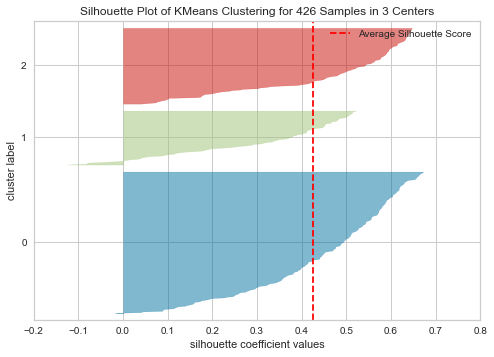

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()

In [92]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.200


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [93]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [94]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,2.749237,3.899850,3.636160,3.062485,3.574967,3.560521,7824.187988,0.168934,0.449107,0.589336,0.183769,2.486486,1.148368,6.591599,1.254683,3.982753,2.131332,1.412651
std,0.378470,0.602121,0.344895,0.321512,0.550546,0.651917,2909.062475,0.532111,0.509240,0.456302,0.274368,1.228359,1.200411,3.018949,0.546449,1.920557,1.062061,0.491134
min,1.825294,2.055744,2.782454,2.253239,0.773190,0.747214,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.481352,3.552946,3.389191,2.858227,3.312419,3.300343,6012.693653,0.000000,0.000000,0.345121,0.000000,1.000000,0.000000,4.347826,0.977719,2.854308,1.421466,1.085454
50%,2.734843,3.902282,3.669379,3.054883,3.620874,3.628809,7913.250518,0.000000,0.377214,0.509170,0.000000,3.000000,0.877193,6.250000,1.288089,3.695823,2.142756,1.372259
75%,3.005986,4.305075,3.883631,3.278674,3.895882,3.956428,9534.895833,0.000000,0.636211,0.771736,0.311535,4.000000,1.675408,8.544403,1.633189,5.211014,2.738620,1.745968
max,3.411887,4.971391,4.581812,4.340771,4.669978,4.970766,13722.931785,3.508772,2.857143,2.519998,1.449275,4.000000,6.567164,20.000000,2.546684,10.714286,5.357143,2.355625


In [139]:
df[df['km_cluster'] == 0]['DONG'].values

array(['사직동', '교남동', '종로1.2.3.4가동', '종로5.6가동', '이화동', '혜화동', '창신1동',
       '창신2동', '창신3동', '숭인2동', '소공동', '회현동', '필동', '을지로동', '다산동', '약수동',
       '청구동', '신당5동', '중림동', '남영동', '청파동', '원효로1동', '효창동', '용문동', '이태원1동',
       '왕십리2동', '사근동', '금호1가동', '금호2.3가동', '금호4가동', '성수1가2동', '성수2가1동',
       '성수2가3동', '중곡1동', '중곡3동', '자양3동', '자양4동', '구의2동', '구의3동', '용신동',
       '제기동', '전농1동', '전농2동', '답십리1동', '답십리2동', '회기동', '휘경1동', '휘경2동',
       '이문1동', '이문2동', '면목2동', '면목4동', '면목5동', '면목본동', '면목7동', '상봉1동',
       '중화1동', '중화2동', '묵1동', '묵2동', '망우3동', '신내2동', '삼선동', '보문동', '길음1동',
       '종암동', '월곡1동', '월곡2동', '장위1동', '장위2동', '장위3동', '삼양동', '미아동', '송중동',
       '송천동', '번1동', '번2동', '수유2동', '수유3동', '창1동', '창2동', '창3동', '창4동',
       '창5동', '도봉2동', '쌍문2동', '쌍문3동', '쌍문4동', '방학1동', '방학2동', '월계1동',
       '월계3동', '공릉1동', '하계2동', '중계2.3동', '상계5동', '상계6.7동', '상계9동',
       '상계10동', '녹번동', '불광2동', '갈현1동', '갈현2동', '구산동', '응암1동', '역촌동',
       '신사1동', '신사2동', '증산동', '북아현동', '충현동', '신촌동', '홍제3동', '남가좌2동',


**km_cluster == 1**

In [95]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [96]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2.863077,4.265618,4.286030,3.661813,4.107319,3.880824,9655.033864,0.350372,1.082853,1.141973,0.376095,2.023529,2.681768,15.168027,1.941968,7.600163,4.029142,1.822868
std,0.429150,0.590339,0.270135,0.350226,0.591256,0.729197,3174.284944,0.933129,0.858110,0.483783,0.437948,1.133646,2.513657,6.748263,0.563302,2.740635,1.627640,0.394215
min,1.563501,2.353640,3.468460,2.993807,1.482832,1.963252,1235.353535,0.000000,0.000000,0.265399,0.000000,1.000000,0.000000,1.351351,0.557481,1.287554,0.000000,0.810930
25%,2.652151,3.883835,4.052530,3.412841,3.920449,3.501764,7638.970588,0.000000,0.416667,0.810930,0.000000,1.000000,1.010101,10.866261,1.563098,5.660377,3.181818,1.519826
50%,2.883090,4.355256,4.308263,3.663138,4.233953,4.056989,10028.169014,0.000000,0.995025,1.134528,0.342466,2.000000,2.016129,13.934426,1.936178,7.459677,4.032258,1.822722
75%,3.230305,4.768752,4.579690,3.859458,4.535333,4.384108,12286.507937,0.000000,1.388889,1.380324,0.529101,3.000000,3.600000,18.354430,2.311635,9.016393,4.838710,2.148939
max,3.411887,4.971391,4.581812,4.779671,4.669978,5.128153,13722.931785,5.405405,4.000000,2.979952,3.030303,4.000000,12.121212,39.130435,3.376251,16.956522,9.090909,2.355625


In [140]:
df[df['km_cluster'] == 1]['DONG'].values

array(['숭인1동', '명동', '광희동', '신당동', '동화동', '황학동', '왕십리도선동', '행당1동', '행당2동',
       '화양동', '군자동', '중곡2동', '자양1동', '구의1동', '장안1동', '장안2동', '상봉2동',
       '동선동', '정릉1동', '길음2동', '삼각산동', '중계1동', '상계2동', '상계8동', '대조동',
       '응암2동', '응암3동', '남가좌1동', '아현동', '공덕동', '용강동', '염리동', '서교동', '망원2동',
       '목2동', '목3동', '목4동', '신월6동', '신정1동', '신정2동', '등촌1동', '등촌3동',
       '화곡2동', '화곡3동', '화곡8동', '우장산동', '방화1동', '구로4동', '가산동', '독산2동',
       '독산4동', '영등포동', '당산1동', '신길5동', '상도3동', '사당4동', '청림동', '중앙동',
       '서초1동', '서초2동', '서초4동', '방배본동', '방배1동', '신사동', '논현1동', '논현2동',
       '청담동', '삼성2동', '대치1동', '대치4동', '역삼1동', '역삼2동', '일원2동', '방이1동',
       '송파1동', '송파2동', '석촌동', '문정1동', '잠실7동', '명일1동', '천호1동', '천호3동',
       '성내1동', '성내2동', '성내3동'], dtype=object)

**km_cluster == 2**

In [97]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [98]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,2.192140,2.945513,2.521226,2.131093,2.644596,2.424569,3485.613475,0.030375,0.173014,0.243622,0.062562,2.756303,0.321237,2.417936,0.714462,1.647711,0.853285,0.767586
std,0.533372,0.812402,0.640287,0.495993,0.719171,0.811656,2088.124480,0.169319,0.272828,0.273822,0.131745,1.234850,0.458814,1.657756,0.429644,1.214879,0.589216,0.526677
min,0.876522,0.743888,0.305382,0.711898,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.777541,2.385269,2.223654,1.814933,2.197836,1.870681,1935.786436,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.175455,0.396777,0.778222,0.410826,0.385414
50%,2.205539,2.942793,2.639784,2.164964,2.704287,2.475454,3165.454545,0.000000,0.000000,0.180561,0.000000,3.000000,0.132802,2.097902,0.734294,1.367054,0.781250,0.713766
75%,2.561580,3.537297,2.958746,2.450980,3.218354,2.998527,4554.126521,0.000000,0.254130,0.310950,0.067660,4.000000,0.486886,3.279609,1.023212,2.223116,1.201474,1.088341
max,3.411887,4.971391,3.794365,3.467471,4.047042,4.321290,12045.833333,1.162791,1.379310,1.548350,0.751880,4.000000,2.500000,8.637874,1.834685,5.633803,2.816901,2.355625


In [141]:
df[df['km_cluster'] == 2]['DONG'].values

array(['청운효자동', '삼청동', '부암동', '평창동', '무악동', '가회동', '장충동', '후암동', '용산2가동',
       '원효로2동', '한강로동', '이촌1동', '이촌2동', '이태원2동', '한남동', '서빙고동', '보광동',
       '마장동', '응봉동', '옥수동', '성수1가1동', '송정동', '용답동', '중곡4동', '능동', '광장동',
       '자양2동', '청량리동', '면목3.8동', '망우본동', '신내1동', '성북동', '돈암1동', '돈암2동',
       '안암동', '정릉2동', '정릉3동', '정릉4동', '석관동', '번3동', '수유1동', '우이동', '인수동',
       '도봉1동', '쌍문1동', '방학3동', '월계2동', '공릉2동', '하계1동', '중계본동', '중계4동',
       '상계1동', '상계3.4동', '불광1동', '수색동', '진관동', '천연동', '연희동', '홍제1동',
       '홍제2동', '홍은1동', '홍은2동', '합정동', '성산2동', '상암동', '신월3동', '신월7동',
       '신정3동', '가양1동', '가양2동', '공항동', '방화2동', '방화3동', '가리봉동', '오류2동',
       '수궁동', '항동', '독산1동', '시흥1동', '시흥2동', '시흥5동', '여의동', '도림동', '양평2동',
       '대림3동', '사당2동', '낙성대동', '남현동', '대학동', '삼성동', '미성동', '방배2동', '방배3동',
       '양재1동', '양재2동', '내곡동', '개포1동', '개포2동', '개포4동', '세곡동', '일원본동',
       '수서동', '풍납1동', '풍납2동', '마천2동', '오륜동', '문정2동', '위례동', '잠실2동',
       '잠실4동', '잠실6동', '강일동', '상일1동', '고덕1동', '고덕2동', '암사2동', '암사3동',
 

### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [99]:
df_0 = df[df['km_cluster'] == 0][tmp_df.columns]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008,2.015445
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,3.174476,3.727413,4.643016,8122.857143,0.000000,2.857143,2.519998,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143,1.349927
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,3.669563,3.489390,3.431697,1008.510638,1.276596,0.425532,1.898183,0.425532,1.0,1.702128,4.255319,1.140285,7.659574,0.000000,2.355625
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,4.581812,3.385520,2.498700,4.492375,3541.666667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.980829
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,3.195528,2.358675,2.002865,4100.000000,0.000000,0.000000,1.812902,1.282051,1.0,0.000000,3.846154,0.825075,8.974359,0.000000,2.355625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,강동구,상일2동,1174052600,10200,0.54,18889,3.252024,3.686098,3.257384,3.138308,3.463128,4.940848,4061.111111,0.000000,0.000000,0.655407,0.925926,1.0,0.000000,4.629630,1.880313,1.851852,1.851852,1.047969
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,3.005989,4.669978,2.769362,4338.144330,0.000000,1.546392,0.934677,0.000000,1.0,1.546392,8.762887,1.972074,5.670103,2.061856,1.409225
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,2.817715,3.868815,2.667137,9568.627451,0.000000,1.307190,0.282768,0.000000,2.0,0.326797,5.228758,1.284920,1.307190,1.633987,0.502952
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,3.050470,3.027289,2.912881,7136.942675,0.000000,1.273885,0.614784,0.212314,3.0,2.760085,2.972399,0.910755,3.609342,0.849257,0.910755


In [100]:
col_0 = df_0.columns[6:]
data_0 = df_0[col_0].values

In [101]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,3.369163,2.585990,2.863980,2234.959350,0.813008,0.000000,1.940475,0.000000,1.0,0.813008,14.634146,1.235188,4.065041,0.813008,2.015445,5589.227228,9.016915
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,3.174476,3.727413,4.643016,8122.857143,0.000000,2.857143,2.519998,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143,1.349927,-298.668477,-1.434963
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,3.669563,3.489390,3.431697,1008.510638,1.276596,0.425532,1.898183,0.425532,1.0,1.702128,4.255319,1.140285,7.659574,0.000000,2.355625,6815.677510,-0.334568
9,종로구,종로5.6가동,1111063000,5476,0.60,9127,3.099341,4.214594,4.581812,3.385520,2.498700,4.492375,3541.666667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.980829,4282.523167,-6.485533
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,3.195528,2.358675,2.002865,4100.000000,0.000000,0.000000,1.812902,1.282051,1.0,0.000000,3.846154,0.825075,8.974359,0.000000,2.355625,3724.188379,-1.491618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,강동구,상일2동,1174052600,10200,0.54,18889,3.252024,3.686098,3.257384,3.138308,3.463128,4.940848,4061.111111,0.000000,0.000000,0.655407,0.925926,1.0,0.000000,4.629630,1.880313,1.851852,1.851852,1.047969,3763.077479,-1.516579
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,3.005989,4.669978,2.769362,4338.144330,0.000000,1.546392,0.934677,0.000000,1.0,1.546392,8.762887,1.972074,5.670103,2.061856,1.409225,3486.043002,3.302719
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,2.817715,3.868815,2.667137,9568.627451,0.000000,1.307190,0.282768,0.000000,2.0,0.326797,5.228758,1.284920,1.307190,1.633987,0.502952,-1744.438711,-2.130365
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,3.050470,3.027289,2.912881,7136.942675,0.000000,1.273885,0.614784,0.212314,3.0,2.760085,2.972399,0.910755,3.609342,0.849257,0.910755,687.246125,-3.477260


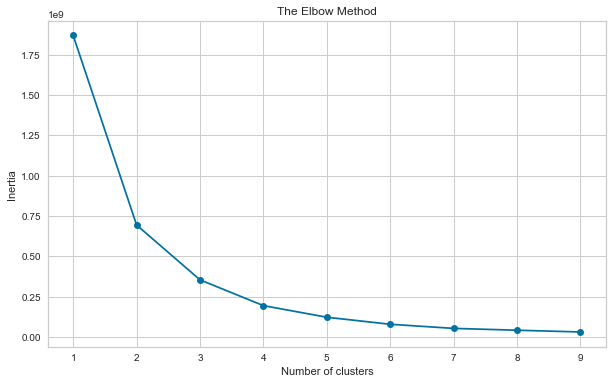

In [102]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [103]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [104]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
1,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48


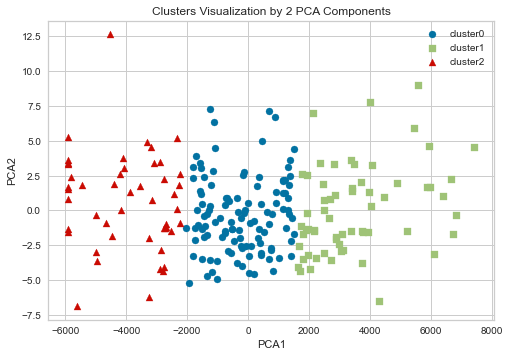

In [105]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [106]:
df_0[df_0['pca_y'] > 12.5] # 교육, MZ 세대가 많은 편, 동물병원 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
393,송파구,삼전동,1171061000,30695,0.95,32311,2.407419,2.820752,4.050411,3.11047,4.570361,3.515465,12361.052632,0.0,0.0,0.719123,0.0,1.0,0.0,20.0,2.242947,5.263158,5.263158,1.425009,-4536.867429,12.621742,2


In [107]:
df_0[df_0['km_cluster'] == 2].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,1.146656e+09,26287.020833,0.762500,35114.166667,2.823499,3.919149,3.758602,3.187946,3.684085,3.695135,11791.396322,0.248223,0.403638,0.527672,0.121951,2.604167,1.306386,7.980401,1.271762,4.760853,2.339986,1.456515,-3967.208598,0.647553,2.0
std,1.799100e+07,9073.783554,0.274261,5926.981878,0.424766,0.552570,0.265517,0.263238,0.400635,0.495673,1326.473033,0.654289,0.428394,0.342540,0.255198,1.316662,1.404347,3.447375,0.560847,1.788918,1.087341,0.457305,1326.473209,3.445289,0.0
min,1.111068e+09,9051.000000,0.260000,23928.000000,1.825294,2.633087,2.853232,2.723533,2.833213,2.233592,10054.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5898.744953,-6.862389,2.0
25%,1.132065e+09,20739.750000,0.620000,30734.750000,2.503041,3.587359,3.650606,3.031324,3.461562,3.488960,10590.118577,0.000000,0.000000,0.373808,0.000000,1.000000,0.000000,5.942780,0.987695,3.502489,1.804613,1.263166,-5099.294069,-1.361558,2.0
50%,1.153066e+09,24958.500000,0.720000,35297.500000,2.887616,3.917953,3.816593,3.112277,3.687495,3.773930,11537.801732,0.000000,0.335017,0.513734,0.000000,3.000000,0.821038,8.280192,1.269690,4.635417,2.259070,1.467018,-3713.614247,0.993429,2.0
75%,1.162060e+09,31441.000000,0.942500,40087.000000,3.171086,4.247076,3.939839,3.359899,3.851603,3.987433,12923.481832,0.000000,0.622402,0.742424,0.147788,4.000000,1.992654,10.127843,1.667591,5.715453,2.776786,1.704599,-2765.930548,2.721993,2.0
max,1.171065e+09,52770.000000,1.550000,47116.000000,3.411887,4.971391,4.135323,4.068492,4.654557,4.581560,13722.931785,3.125000,2.500000,1.235188,1.282051,4.000000,6.285714,20.000000,2.242947,10.714286,5.263158,2.355625,-2229.812443,12.621742,2.0


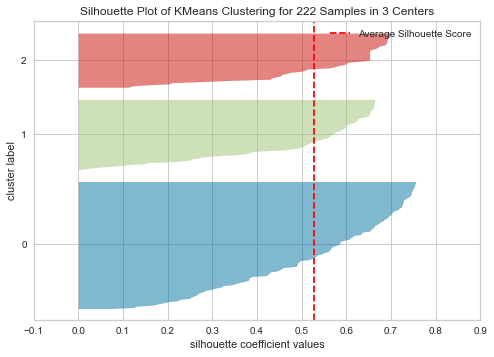

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 222 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [108]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [109]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.527


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [110]:
df_1 = df[df['km_cluster'] == 1][tmp_df.columns]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,3.501108,3.232693,4.225246,7308.695652,4.347826,0.000000,1.154965,0.000000,1.0,6.521739,10.869565,1.676690,8.695652,4.347826,2.017797
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.000000,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.000000,2.355625
22,중구,광희동,1114059000,6340,0.74,8568,3.242909,4.820064,3.881564,4.337732,1.482832,3.308766,3525.675676,5.405405,1.351351,1.745668,0.000000,1.0,6.756757,1.351351,1.309063,7.432432,0.675676,2.355625
24,중구,신당동,1114061500,9095,0.55,16536,3.411887,4.965807,4.150992,3.761200,3.195328,4.054679,6552.727273,1.818182,0.303030,1.597243,0.000000,1.0,0.000000,11.515152,1.230880,9.393939,2.727273,0.922333
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,4.399816,4.032878,3.920449,4.542749,10430.769231,0.000000,0.641026,0.495321,0.000000,3.0,0.000000,12.820513,0.825075,8.333333,5.769231,1.436305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,3.817764,3.793958,3.676241,10816.901408,0.000000,2.816901,1.057073,0.469484,1.0,6.103286,6.572770,1.455444,7.981221,1.877934,1.455444
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,3.713469,3.689723,3.572322,12037.974684,0.000000,2.531646,0.988710,0.421941,1.0,5.485232,5.907173,1.374623,7.172996,1.687764,1.374623
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,3.959499,4.376335,3.600927,10234.482759,0.000000,1.149425,1.193574,0.000000,1.0,2.873563,17.241379,2.202320,11.494253,4.597701,1.614025
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100,1.500200


In [111]:
col_1 = df_1.columns[6:]
data_1 = df_1[col_1].values

In [112]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,3.501108,3.232693,4.225246,7308.695652,4.347826,0.000000,1.154965,0.000000,1.0,6.521739,10.869565,1.676690,8.695652,4.347826,2.017797,2346.337566,-4.322977
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,4.723985,2.770377,3.816491,1235.353535,3.030303,0.000000,2.979952,3.030303,1.0,1.010101,18.181818,1.393842,7.070707,0.000000,2.355625,8419.681592,2.482400
22,중구,광희동,1114059000,6340,0.74,8568,3.242909,4.820064,3.881564,4.337732,1.482832,3.308766,3525.675676,5.405405,1.351351,1.745668,0.000000,1.0,6.756757,1.351351,1.309063,7.432432,0.675676,2.355625,6129.357748,-14.289655
24,중구,신당동,1114061500,9095,0.55,16536,3.411887,4.965807,4.150992,3.761200,3.195328,4.054679,6552.727273,1.818182,0.303030,1.597243,0.000000,1.0,0.000000,11.515152,1.230880,9.393939,2.727273,0.922333,3102.306724,-3.514962
29,중구,동화동,1114066500,10433,0.26,40127,2.192942,4.971391,4.399816,4.032878,3.920449,4.542749,10430.769231,0.000000,0.641026,0.495321,0.000000,3.0,0.000000,12.820513,0.825075,8.333333,5.769231,1.436305,-775.735619,-2.078636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,3.817764,3.793958,3.676241,10816.901408,0.000000,2.816901,1.057073,0.469484,1.0,6.103286,6.572770,1.455444,7.981221,1.877934,1.455444,-1161.868271,-8.689501
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,3.713469,3.689723,3.572322,12037.974684,0.000000,2.531646,0.988710,0.421941,1.0,5.485232,5.907173,1.374623,7.172996,1.687764,1.374623,-2382.941197,-9.415635
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,3.959499,4.376335,3.600927,10234.482759,0.000000,1.149425,1.193574,0.000000,1.0,2.873563,17.241379,2.202320,11.494253,4.597701,1.614025,-579.449565,2.663398
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,3.818204,4.234034,3.460905,12134.328358,0.000000,0.995025,1.095290,0.000000,1.0,2.487562,14.925373,2.075079,9.950249,3.980100,1.500200,-2479.294722,0.173292


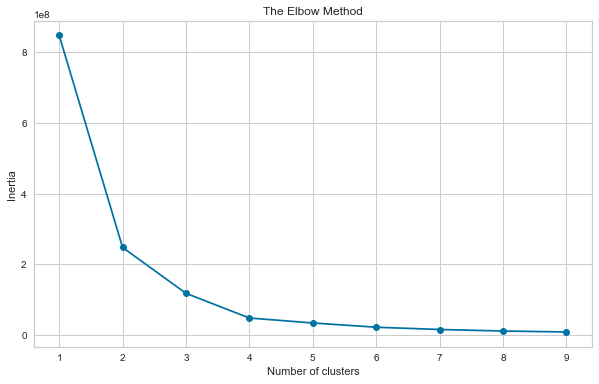

In [113]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [114]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [115]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
1,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


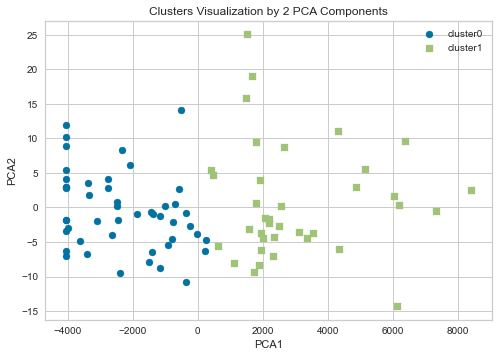

In [116]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1'])
plt.show()

In [117]:
df_1[df_1['pca_y'] > 20] # 편의시설, 교육이 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,4.779671,4.669978,3.501764,8150.434783,0.0,0.869565,2.43666,0.869565,1.0,4.782609,39.130435,3.376251,16.521739,6.521739,2.355625,1504.598045,25.050296,1


In [118]:
df_1[df_1['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,1.146342e+09,23263.500000,0.651250,37294.354167,2.874278,4.280964,4.287659,3.617992,4.121380,4.108032,11984.919521,0.088976,1.258709,1.031678,0.274770,2.125000,3.021514,14.537924,1.814401,7.805132,4.323695,1.798635,-2329.885768,-0.541426,0.0
std,1.897597e+07,5867.996809,0.227059,7032.776542,0.393801,0.586877,0.248402,0.304284,0.487257,0.551973,1477.528675,0.310883,0.846133,0.337935,0.295222,1.160062,2.745561,5.513381,0.429207,2.605354,1.726424,0.377693,1477.528642,5.607002,0.0
min,1.114066e+09,10433.000000,0.260000,22075.000000,1.995303,2.353640,3.745520,2.993807,1.996554,2.428762,9399.200000,0.000000,0.000000,0.336472,0.000000,1.000000,0.000000,4.529617,0.676887,3.636364,1.333333,0.810930,-4067.899637,-10.791576,0.0
25%,1.129061e+09,20142.500000,0.530000,33702.250000,2.674816,4.111350,4.063675,3.409930,3.970291,3.776146,10642.280147,0.000000,0.807127,0.802624,0.000000,1.000000,1.246986,10.766667,1.563098,5.570074,3.195455,1.500490,-4067.896574,-4.634768,0.0
50%,1.147058e+09,23361.000000,0.615000,37526.000000,2.889250,4.355256,4.308263,3.661502,4.166753,4.247764,12125.654745,0.000000,1.164335,1.058609,0.235849,2.000000,2.473289,13.863765,1.759228,7.787529,4.245283,1.822722,-2470.621431,-1.141091,0.0
75%,1.159812e+09,26253.000000,0.752500,40624.250000,3.120601,4.652167,4.524621,3.817874,4.360699,4.460409,13722.931785,0.000000,1.770335,1.277540,0.446318,3.000000,3.812500,17.689565,2.214315,9.189523,5.098684,2.090037,-987.245739,2.833355,0.0
max,1.174066e+09,38794.000000,1.260000,55657.000000,3.411887,4.971391,4.581812,4.262836,4.669978,5.063499,13722.931785,1.562500,3.030303,1.994592,0.943396,4.000000,12.121212,29.245283,2.460809,16.956522,9.090909,2.355625,255.833924,14.116603,0.0


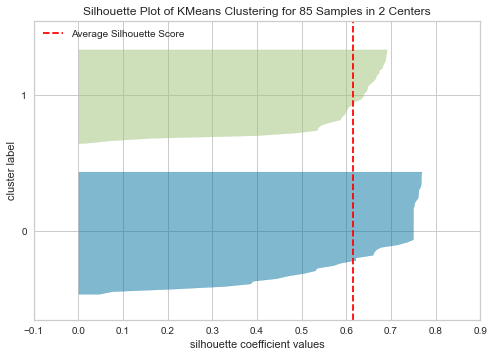

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 85 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [119]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [120]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.615


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [121]:
df_2 = df[df['km_cluster'] == 2][tmp_df.columns]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.0,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.0,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586,0.365010
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.0,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000,0.203332
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,2.340737,3.804190,3.613916,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.329136,2.777778,0.000000,1.329136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,1.954403,3.091947,3.119797,2992.537313,0.0,0.248756,0.222148,0.000000,2.0,0.000000,1.492537,0.222148,0.497512,0.995025,0.557481
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,2.681331,3.726374,2.532261,3988.135593,0.0,1.129944,0.248800,0.000000,2.0,0.282486,4.519774,1.181693,1.129944,1.412429,0.447868
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,2.000906,2.998385,1.863287,1699.203187,0.0,0.531208,0.124694,0.000000,3.0,0.132802,2.124834,0.723879,0.531208,0.664011,0.235550
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435,0.434038


In [122]:
col_2 = df_2.columns[6:]
data_2 = df_2[col_2].values

In [124]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,1.712617,1.901003,1.348966,1249.027237,0.0,0.000000,0.121954,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,1.080287,-2236.587025,-2.217173
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,2.333641,0.696497,2.126152,459.060403,0.0,0.000000,0.513507,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,1.614793,-3026.553427,-0.195501
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,1.767232,2.305664,1.163976,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.631834,2.202643,1.321586,0.365010,-2346.847154,-0.928172
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,0.838238,1.167229,0.754899,518.263811,0.0,0.000000,0.106825,0.000000,4.0,0.000000,0.563698,0.447053,0.000000,0.000000,0.203332,-2967.351525,-2.295779
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,2.340737,3.804190,3.613916,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.329136,2.777778,0.000000,1.329136,1575.498029,-2.033979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,1.954403,3.091947,3.119797,2992.537313,0.0,0.248756,0.222148,0.000000,2.0,0.000000,1.492537,0.222148,0.497512,0.995025,0.557481,-493.076370,-0.957556
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,2.681331,3.726374,2.532261,3988.135593,0.0,1.129944,0.248800,0.000000,2.0,0.282486,4.519774,1.181693,1.129944,1.412429,0.447868,502.522983,1.972052
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,2.000906,2.998385,1.863287,1699.203187,0.0,0.531208,0.124694,0.000000,3.0,0.132802,2.124834,0.723879,0.531208,0.664011,0.235550,-1786.410520,-0.120772
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,2.630872,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,1.449473,2.173913,1.630435,0.434038,-3449.742720,3.139481


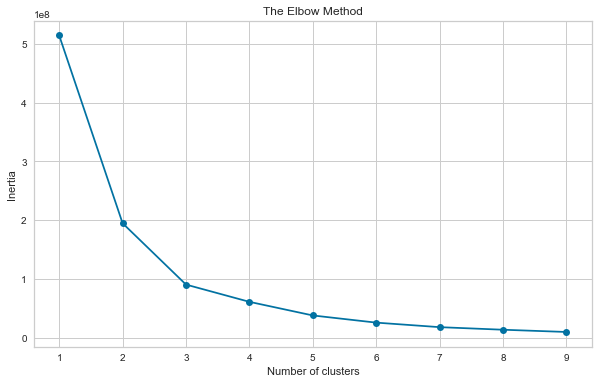

In [125]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 2(Elbow)로 설정

In [126]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [127]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
1,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


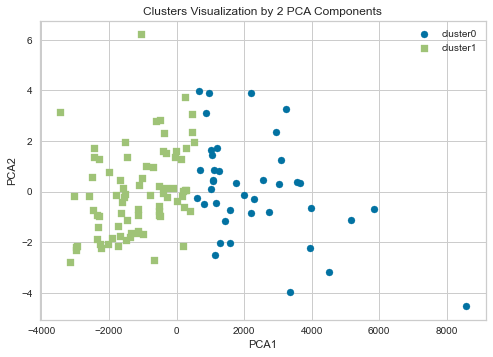

In [128]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

In [129]:
df_2[df_2['pca_x'] > 8000] # 편의시설의 수가 적고, MZ 세대 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
114,성북구,돈암2동,1129059000,23913,0.48,49819,3.192703,2.965416,2.232848,1.381945,3.256894,2.19568,12045.833333,0.0,0.347222,0.298045,0.0,3.0,0.0,1.041667,1.006538,1.388889,0.347222,0.0,8560.218461,-4.531946,0


In [131]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,1.141738e+09,23086.150000,1.306250,19484.250000,2.534308,3.379715,2.841959,2.397045,3.030593,2.689464,5789.070612,0.029070,0.159107,0.197368,0.075468,2.450000,0.383448,2.891407,0.889370,2.364594,1.102517,0.784181,2303.457482,0.091735,0.0
std,1.935826e+07,9961.572267,0.656274,7232.907284,0.503157,0.742356,0.410863,0.431004,0.497761,0.752504,1674.718108,0.183853,0.278767,0.273465,0.162148,1.239313,0.556675,1.730746,0.450969,1.350831,0.705761,0.604250,1674.717939,1.999251,0.0
min,1.111057e+09,8297.000000,0.360000,7680.000000,0.930052,1.451139,1.466337,1.366543,1.609438,0.000000,4101.568627,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,615.954654,-4.531946,0.0
25%,1.124939e+09,15436.500000,0.860000,15417.750000,2.363351,2.939284,2.677840,2.195284,2.697835,2.192293,4556.373605,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.522581,0.639562,1.542075,0.657233,0.343525,1070.760517,-0.828429,0.0
50%,1.141062e+09,22324.500000,1.180000,18827.500000,2.565559,3.466190,2.896980,2.450980,3.127644,2.802425,5156.650224,0.000000,0.000000,0.105170,0.000000,3.000000,0.065359,2.610554,0.985821,2.020408,1.123596,0.770893,1671.037121,0.186567,0.0
75%,1.156062e+09,26166.000000,1.687500,21991.000000,2.923268,3.827209,3.060288,2.660785,3.384718,3.201188,6614.620331,0.000000,0.241347,0.286178,0.062425,4.000000,0.632566,3.930142,1.144271,3.051445,1.418612,1.160305,3129.007664,0.962510,0.0
max,1.174070e+09,49979.000000,3.050000,49819.000000,3.411887,4.971391,3.493439,3.320591,3.829206,3.877851,12045.833333,1.162791,1.156069,1.180389,0.751880,4.000000,2.500000,6.515152,1.834685,5.633803,2.816901,2.218847,8560.218461,3.981684,0.0


In [132]:
df_2[df_2['pca_y'] > 6] # 동물병원 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
45,용산구,한남동,1117068500,22941,3.01,7622,2.442491,2.74842,2.41704,2.290217,1.794524,1.788987,2432.225914,0.996678,0.0,0.509496,0.0,3.0,0.664452,8.637874,0.691485,2.990033,1.66113,1.096395,-1053.386096,6.20874,1


In [133]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARENTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,VEGAN_NUM,pca_x,pca_y,km_cluster
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,1.141738e+09,23086.150000,1.306250,19484.250000,2.534308,3.379715,2.841959,2.397045,3.030593,2.689464,5789.070612,0.029070,0.159107,0.197368,0.075468,2.450000,0.383448,2.891407,0.889370,2.364594,1.102517,0.784181,2303.457482,0.091735,0.0
std,1.935826e+07,9961.572267,0.656274,7232.907284,0.503157,0.742356,0.410863,0.431004,0.497761,0.752504,1674.718108,0.183853,0.278767,0.273465,0.162148,1.239313,0.556675,1.730746,0.450969,1.350831,0.705761,0.604250,1674.717939,1.999251,0.0
min,1.111057e+09,8297.000000,0.360000,7680.000000,0.930052,1.451139,1.466337,1.366543,1.609438,0.000000,4101.568627,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,615.954654,-4.531946,0.0
25%,1.124939e+09,15436.500000,0.860000,15417.750000,2.363351,2.939284,2.677840,2.195284,2.697835,2.192293,4556.373605,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.522581,0.639562,1.542075,0.657233,0.343525,1070.760517,-0.828429,0.0
50%,1.141062e+09,22324.500000,1.180000,18827.500000,2.565559,3.466190,2.896980,2.450980,3.127644,2.802425,5156.650224,0.000000,0.000000,0.105170,0.000000,3.000000,0.065359,2.610554,0.985821,2.020408,1.123596,0.770893,1671.037121,0.186567,0.0
75%,1.156062e+09,26166.000000,1.687500,21991.000000,2.923268,3.827209,3.060288,2.660785,3.384718,3.201188,6614.620331,0.000000,0.241347,0.286178,0.062425,4.000000,0.632566,3.930142,1.144271,3.051445,1.418612,1.160305,3129.007664,0.962510,0.0
max,1.174070e+09,49979.000000,3.050000,49819.000000,3.411887,4.971391,3.493439,3.320591,3.829206,3.877851,12045.833333,1.162791,1.156069,1.180389,0.751880,4.000000,2.500000,6.515152,1.834685,5.633803,2.816901,2.218847,8560.218461,3.981684,0.0


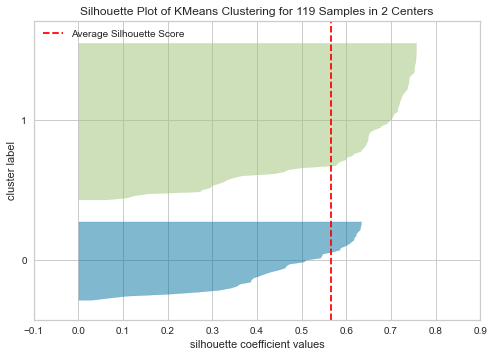

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 119 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [134]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [135]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.565
